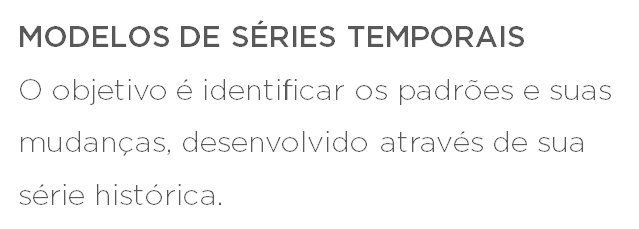

 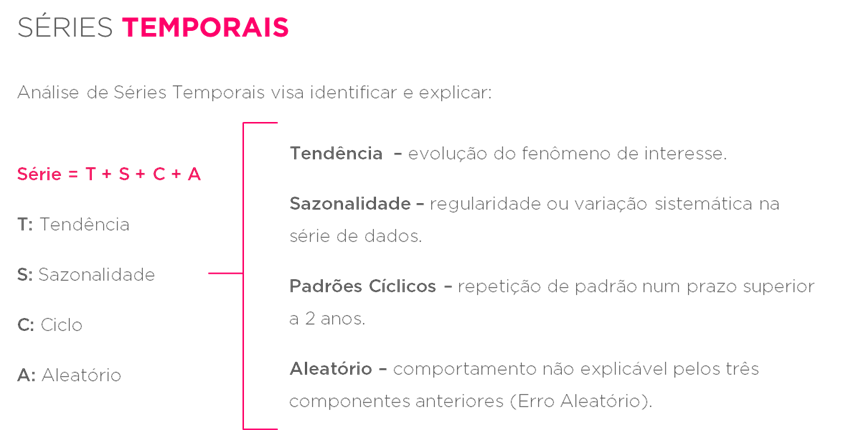

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime


In [2]:
# para leitura de coluna do tipo data

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# leitura da base

df = pd.read_csv(r'C:/Users/AdelaideAlvesdeOlive/OneDrive - SD&W/1-Material/IAeML/SeriesTemporais/Faturamento_v2.csv', ";")


In [3]:
df.head()

,Ano_Mes,Faturamento
0,2011-01,43484
1,2011-02,45859
2,2011-03,56254
3,2011-04,58224
4,2011-05,75403


In [4]:
df['Ano_Mes'] = pd.to_datetime(df['Ano_Mes'], format='%Y-%m-%d')
df.head()

,Ano_Mes,Faturamento
0,2011-01-01,43484
1,2011-02-01,45859
2,2011-03-01,56254
3,2011-04-01,58224
4,2011-05-01,75403


In [6]:
df.dtypes

Ano_Mes        datetime64[ns]
Faturamento             int64
dtype: object

In [7]:
df.index

RangeIndex(start=0, stop=36, step=1)

In [8]:
print (df.dtypes)

Ano_Mes        datetime64[ns]
Faturamento             int64
dtype: object


In [9]:
df.set_index("Ano_Mes", inplace=True)

<AxesSubplot:title={'center':'Faturamento'}, xlabel='Ano_Mes'>

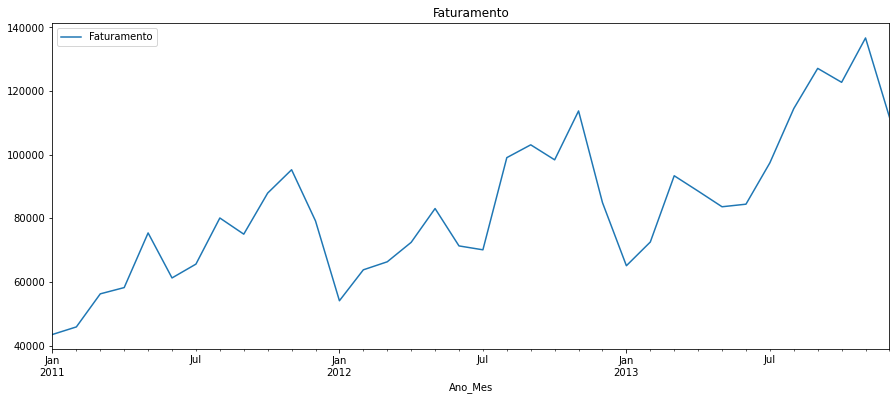

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


df[['Faturamento']].plot(title='Faturamento')


In [12]:
print(df.shape)


(36, 1)


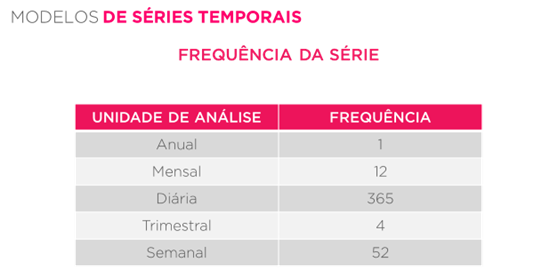

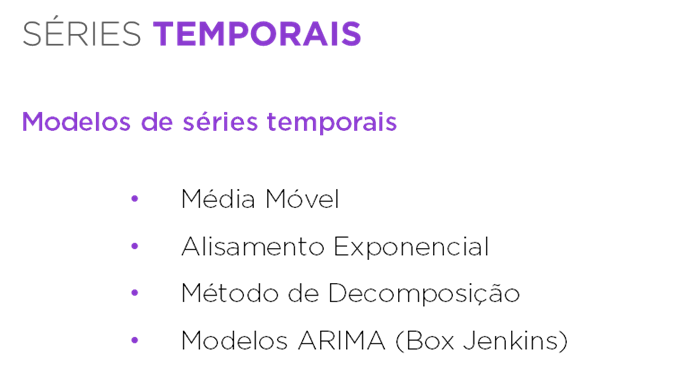

In [23]:
# time series - statsmodels 

# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# holt winters 
# single exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

# double and triple exponential smoothing

# from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

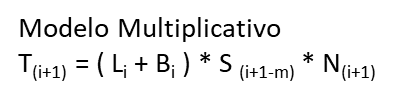
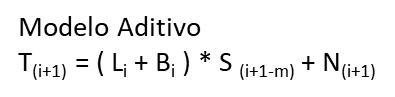
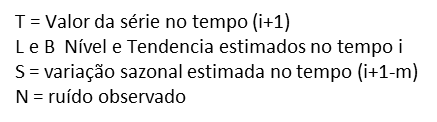

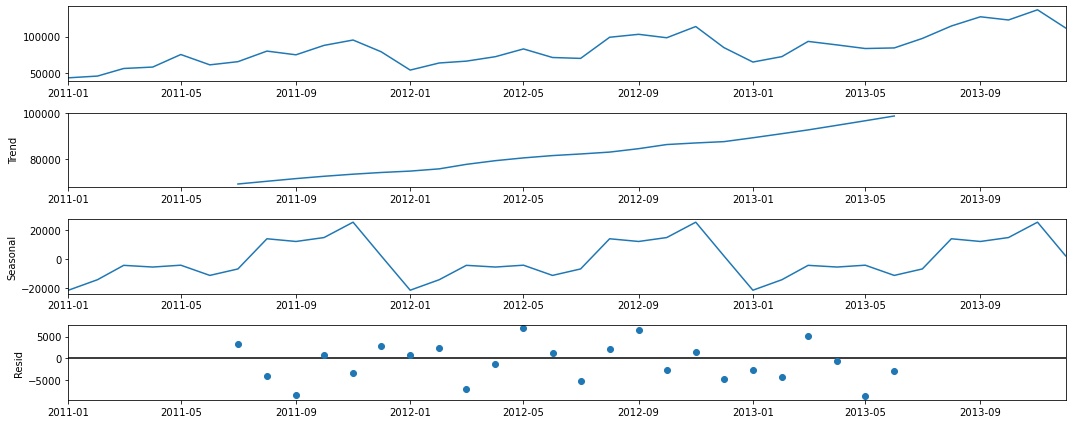

In [13]:
result = seasonal_decompose(df, model='additive')

#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

result.plot()
plt.show()

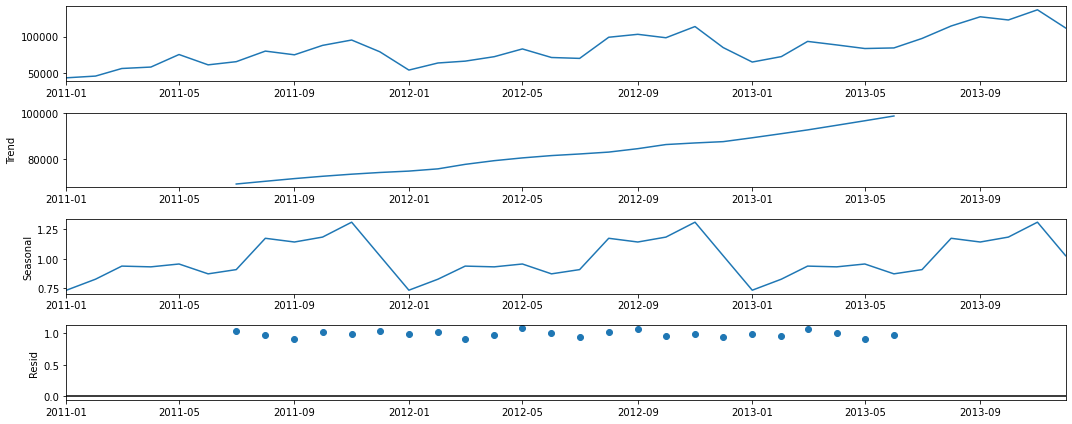

In [14]:
result = seasonal_decompose(df, model='multiplicative')

#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

result.plot()
plt.show()

In [15]:
# com seasonal_periods=12 Aditivo

fit1 = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [20]:
fit1

In [24]:
# com  seasonal_periods=12  Multiplicativo

fit2 = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [22]:
fit2

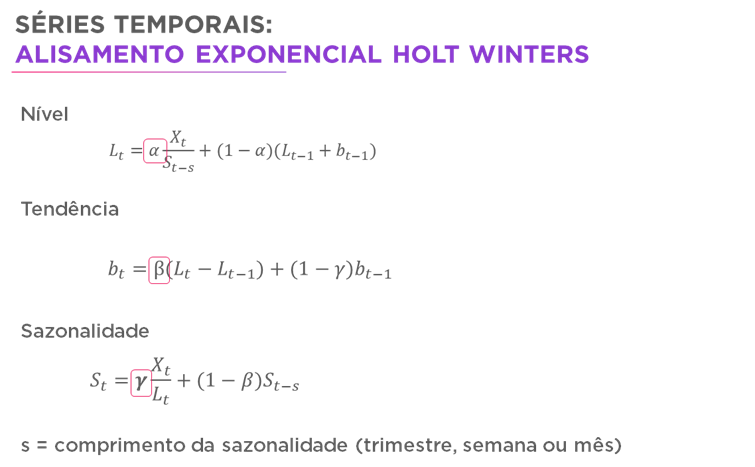

In [25]:
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]


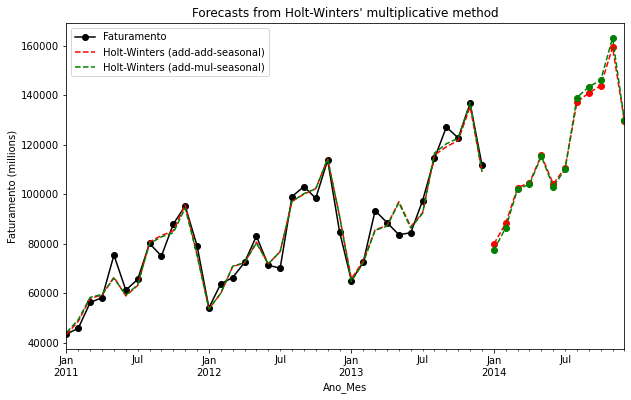

Figure 1: Forecasting Faturamento using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative
$\alpha$,1.490124e-08,1.490118e-08
$\beta$,2.221115e-09,1.215425e-10
$\phi$,NaN,NaN
$\gamma$,2.279575e-12,0.000000e+00
$l_0$,5.696178e+01,5.604003e+01
$b_0$,2.535250e-01,2.499607e-01
SSE,6.918961e+08,6.761785e+08


In [27]:
ax = df.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("Faturamento (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(12).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(12).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 1: Forecasting Faturamento using Holt-Winters method with both additive and multiplicative seasonality."
)

results

In [28]:
# Selecionando o modelo com menor RMSE

fit3 = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [29]:
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
    )
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
#results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit3.params[p] for p in params] + [fit3.sse]


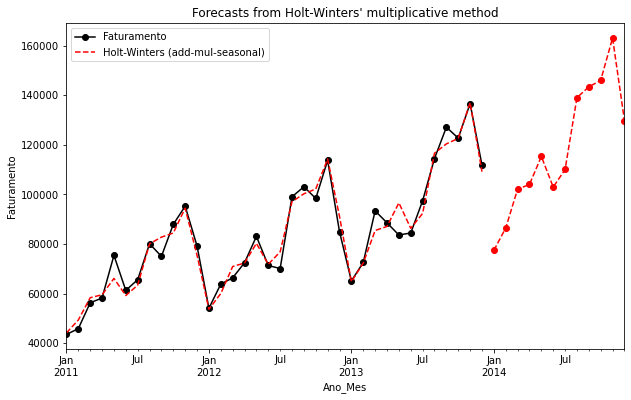

Figure 2: Forecasting Faturamento using Holt-Winters method with multiplicative seasonality.


,Multiplicative
$\alpha$,1.490118e-08
$\beta$,1.215425e-10
$\phi$,NaN
$\gamma$,0.000000e+00
$l_0$,5.604003e+01
$b_0$,2.499607e-01
SSE,6.761785e+08


In [30]:

ax = df.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("Faturamento")
ax.set_xlabel("Mês/Ano")
fit3.fittedvalues.plot(ax=ax, style="--", color="red")
fit3.forecast(12).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)


plt.show()
print(
    "Figure 2: Forecasting Faturamento using Holt-Winters method with multiplicative seasonality."
)

results

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Ano_Mes', ylabel='Faturamento'>

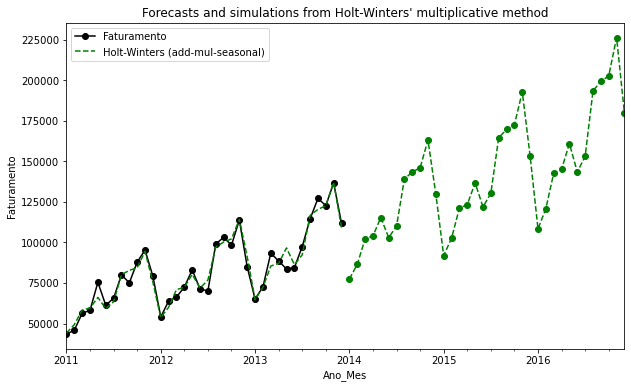

In [34]:
# forecast 3 anos - 36 meses
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Multiplicative"] = [fit3.params[p] for p in params] + [fit3.sse]
ax = df.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts and simulations from Holt-Winters' multiplicative method",
)
ax.set_ylabel("Faturamento")
ax.set_xlabel("Mês/Ano")
fit3.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.forecast(36).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)


In [40]:
fit3.fittedvalues

Ano_Mes
2011-01-01     44127.635708
2011-02-01     49332.441981
2011-03-01     58317.074709
2011-04-01     59525.705185
2011-05-01     66096.722138
2011-06-01     59198.840669
2011-07-01     63385.348972
2011-08-01     80091.256257
2011-09-01     82770.201820
2011-10-01     84437.254081
2011-11-01     94458.229446
2011-12-01     75450.618524
2012-01-01     53692.590746
2012-02-01     59998.777332
2012-03-01     70907.341128
2012-04-01     72321.379121
2012-05-01     80266.007898
2012-06-01     71804.203657
2012-07-01     76836.741719
2012-08-01     97080.963076
2012-09-01    100257.403287
2012-10-01    102201.051244
2012-11-01    114277.349813
2012-12-01     91148.713988
2013-01-01     64743.206667
2013-02-01     72317.893257
2013-03-01     85445.758323
2013-04-01     87088.845177
2013-05-01     96613.066931
2013-06-01     86334.582990
2013-07-01     92335.768731
2013-08-01    116655.916440
2013-09-01    120395.333625
2013-10-01    122646.630836
2013-11-01    137080.956851
2013-12-01  

<bound method HoltWintersResults.forecast of <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001F81AE7BF40>>

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Ano_Mes', ylabel='Faturamento'>

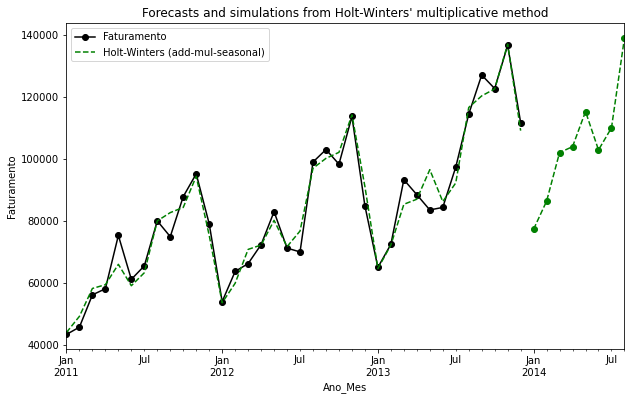

In [32]:
# forecast  8 meses
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Multiplicative"] = [fit3.params[p] for p in params] + [fit3.sse]
ax = df.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts and simulations from Holt-Winters' multiplicative method",
)
ax.set_ylabel("Faturamento")
ax.set_xlabel("Mês/Ano")
fit3.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
